In [75]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
import os
import json

In [76]:
category = 'science'

In [77]:
def read_file(category, file_name):
    grouped_data = defaultdict(list)
    with open(file_name, 'r') as file:
        lines = file.readlines()

        epoch = np.nan
        precision = np.nan
        recall = np.nan
        f_score = np.nan
        accuracy = np.nan
        g_mean = np.nan
        model = ''
        datasets = []
        model_id = ''
        batch_size = np.nan
        layers_frozen = np.nan
        learning_rate = np.nan
        training_time = np.nan
        inference_time = np.nan
        class_weights = []

        training_loss = defaultdict(list)

        for line in lines:
            if 'Starting detection model' in line:
                model_id = line.split(' - ')[1].strip()

            info = line.split(' - ')[1]

            if 'Model name: ' in info:
                model = info.split('Model name: ')[1].split(' ')[0].strip()

            if 'train loss' in info:
                training_loss[int(re.findall(r'\d+', info)[0])].append(float(re.findall(r'\d+\.\d+', info)[0]))

            if 'Epoch' in info:
                epoch = int(re.findall(r'\d+', info)[0])

            if 'Precision' in info:
                precision = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Recall' in info:
                recall = float(re.findall(r'\d+\.\d+', info)[0])
                
            if 'F-score' in info:
                f_score = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Accuracy' in info:
                accuracy = float(re.findall(r'\d+\.\d+', info)[0])

            if 'G-mean' in info:
                g_mean = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Datasets list: ' in info:
                datasets = [dataset.strip() for dataset in info.split('Datasets list: ')[1].split(',')]

            if 'Batch size: ' in info:
                batch_size = int(re.findall(r'\d+', info)[0])

            if 'Layers frozen: ' in info:
                layers_frozen = int(re.findall(r'\d+', info)[0])

            if 'Learning rate: ' in info:
                learning_rate = float(info.split('Learning rate: ')[1].split(' ')[0].strip())

            if 'Class weights: ' in info:
                class_weights = info.split('Class weights: ')[1].strip()

            
            if 'Training time' in info:
                training_time = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Inference time' in info:
                inference_time = float(re.findall(r'\d+\.\d+', info)[0])

            if 'Model not saved' in info or 'Model saved' in info:
                grouped_data[category].append({
                    'model_id': model_id,
                    'model': model,
                    'category': category,
                    'datasets': datasets,
                    'batch_size': batch_size,
                    'epochs': epoch,
                    'precision': precision,
                    'recall': recall,
                    'f_score': f_score,
                    'accuracy': accuracy,
                    'g_mean': g_mean,
                    'training_loss': training_loss,
                    'layers_frozen': layers_frozen,
                    'learning_rate': learning_rate,
                    'class_weights': class_weights,
                    'training_time': training_time,
                    'inference_time': inference_time,
                })
                epoch = np.nan
                precision = np.nan
                recall = np.nan
                f_score = np.nan
                accuracy = np.nan
                g_mean = np.nan
                model = ''
                datasets = []
                model_id = ''
                batch_size = np.nan
                layers_frozen = np.nan
                learning_rate = np.nan
                class_weights = []
                training_loss = defaultdict(list)
                training_time = np.nan
                inference_time = np.nan
            
    return grouped_data

In [78]:
# Initialize defaultdict to group data points per epoch
grouped_data = defaultdict(list)

# Read all log files
categories = ['crime', 'health', 'politics', 'science', 'social_media']
log_files = []
for category in categories:
    print(category)
    log_files = [f for f in os.listdir(f'./results/{category}') if f.endswith('.log')]

    for log_file in log_files:
        file_data = read_file(category, f'./results/{category}/{log_file}')

        for key, value in file_data.items():
            grouped_data[key].extend(value)
        
        print(log_file, len(file_data))

crime
training_log_20231130_234910.log 1
training_log_20231201_003405.log 1
training_log_20231201_003458.log 1
training_log_20231201_003531.log 1
training_log_20231201_003603.log 1
training_log_20231201_003658.log 1
training_log_20231212_155553.log 0
training_log_20231213_011711.log 1
training_log_20231213_012354.log 1
training_log_20231213_013031.log 1
training_log_20231213_013130.log 1
training_log_20231213_013224.log 1
training_log_20231213_013755.log 1
training_log_20231214_175054.log 1
training_log_20231215_165734.log 1
training_log_20231215_173752.log 1
training_log_20231215_181649.log 1
training_log_20231215_185309.log 1
training_log_20231215_193055.log 1
training_log_20231219_184903.log 1
training_log_20231219_185107.log 1
training_log_20231219_185524.log 1
training_log_20231219_185607.log 1
training_log_20231219_185650.log 1
training_log_20231219_195738.log 1
training_log_20231220_002710.log 1
training_log_20231220_002915.log 1
training_log_20231220_003020.log 1
training_log_2

In [79]:
grouped_data

defaultdict(list,
            {'crime': [{'model_id': 'pyF83A0HiP',
               'model': 'bert-base-uncased',
               'category': 'crime',
               'datasets': ['crime'],
               'batch_size': nan,
               'epochs': nan,
               'precision': 0.5801886792452831,
               'recall': 1.0,
               'f_score': 0.7343283582089553,
               'accuracy': 0.6026785714285714,
               'g_mean': 0.7763237542601484,
               'training_loss': defaultdict(list, {}),
               'layers_frozen': 0,
               'learning_rate': 1e-05,
               'class_weights': '[0.45, 0.55]',
               'training_time': 2678.3652698993683,
               'inference_time': 3.7205562591552734},
              {'model_id': 'XhJkd7sAFd',
               'model': 'bert-base-cased',
               'category': 'crime',
               'datasets': ['crime'],
               'batch_size': nan,
               'epochs': nan,
               'precision': 

In [80]:
# in each category, sort by the model name
for key, value in grouped_data.items():
    grouped_data[key] = sorted(value, key=lambda k: k['model'])

grouped_data

defaultdict(list,
            {'crime': [{'model_id': 'ilP3hFukta',
               'model': 'albert-base-v2',
               'category': 'crime',
               'datasets': ['crime'],
               'batch_size': nan,
               'epochs': nan,
               'precision': 0.8837209302325582,
               'recall': 0.3089430894308943,
               'f_score': 0.45783132530120485,
               'accuracy': 0.5982142857142857,
               'g_mean': 0.42990018558994264,
               'training_loss': defaultdict(list, {}),
               'layers_frozen': 0,
               'learning_rate': 1e-05,
               'class_weights': '[0.45, 0.55]',
               'training_time': 42.79384517669678,
               'inference_time': 4.101649284362793},
              {'model_id': '2ivAInXDBl',
               'model': 'albert-base-v2',
               'category': 'crime',
               'datasets': ['crime'],
               'batch_size': nan,
               'epochs': nan,
               'p

In [81]:
# get a count of the number of data points for each metric in each category for each model
data_points = defaultdict(dict)
for category, data in grouped_data.items():
    for model in data:
        for metric in ['precision', 'recall', 'f_score', 'accuracy', 'g_mean']:
            if model['model'] not in data_points[category]:
                data_points[category][model['model']] = defaultdict(int)
            if not np.isnan(model[metric]):
                data_points[category][model['model']][metric] += 1

data_points

defaultdict(dict,
            {'crime': {'albert-base-v2': defaultdict(int,
                          {'precision': 9,
                           'recall': 9,
                           'f_score': 9,
                           'accuracy': 9,
                           'g_mean': 9}),
              'bert-base-cased': defaultdict(int,
                          {'precision': 9,
                           'recall': 9,
                           'f_score': 9,
                           'accuracy': 9,
                           'g_mean': 9}),
              'bert-base-uncased': defaultdict(int,
                          {'precision': 9,
                           'recall': 9,
                           'f_score': 9,
                           'accuracy': 9,
                           'g_mean': 9}),
              'distilbert-base-uncased': defaultdict(int,
                          {'precision': 9,
                           'recall': 9,
                           'f_score': 9,
                

In [82]:
# Calculate the average for each metric in each category for each model, excluding zero values
averages = defaultdict(dict)
for category, data in grouped_data.items():
    for model in data:
        for metric in ['precision', 'recall', 'f_score', 'accuracy', 'g_mean']:
            if model['model'] not in averages[category]:
                averages[category][model['model']] = defaultdict(float)
            if not np.isnan(model[metric]) or data_points[category][model['model']][metric] > 0:
                averages[category][model['model']][metric] += model[metric] / data_points[category][model['model']][metric]

averages

defaultdict(dict,
            {'crime': {'albert-base-v2': defaultdict(float,
                          {'precision': 0.8229372094292344,
                           'recall': 0.42822597456743794,
                           'f_score': 0.530971721252279,
                           'accuracy': 0.6145171957671958,
                           'g_mean': 0.5037268474324073}),
              'bert-base-cased': defaultdict(float,
                          {'precision': 0.7504794550479386,
                           'recall': 0.6075579644685335,
                           'f_score': 0.6062709131053894,
                           'accuracy': 0.611276455026455,
                           'g_mean': 0.5933971446005292}),
              'bert-base-uncased': defaultdict(float,
                          {'precision': 0.6423020231328738,
                           'recall': 0.48395061728395056,
                           'f_score': 0.5044549381597725,
                           'accuracy': 0.58546075837742

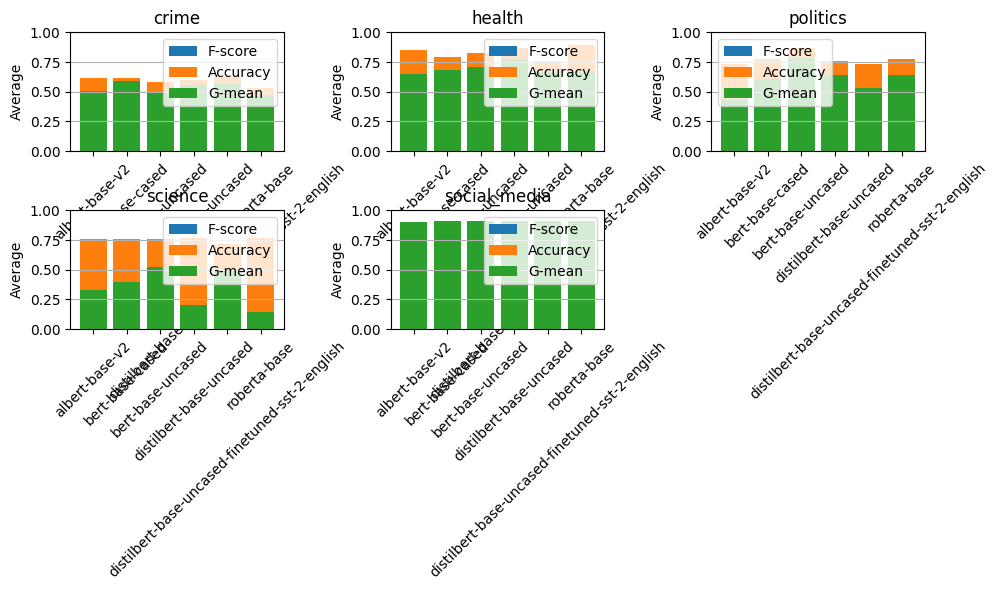

In [83]:
# Plotting
plt.figure(figsize=(10, 6))

# make a grouped bar graph for the average for each metric, grouped by category and with a bar for each model
for i, category in enumerate(categories):
    plt.subplot(2, 3, i+1)
    plt.title(category)
    plt.ylabel('Average')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.bar([model for model in averages[category].keys()], [np.mean(value['f_score']) for value in averages[category].values()], label='F-score')
    plt.bar([model for model in averages[category].keys()], [np.mean(value['accuracy']) for value in averages[category].values()], label='Accuracy')
    plt.bar([model for model in averages[category].keys()], [np.mean(value['g_mean']) for value in averages[category].values()], label='G-mean')
    plt.legend()

plt.show()

In [84]:
# Get the best value for each metric in each category for each model
best = defaultdict(dict)
for category, data in grouped_data.items():
    for model in data:
        for metric in ['precision', 'recall', 'f_score', 'accuracy', 'g_mean']:
            if model['model'] not in best[category]:
                best[category][model['model']] = defaultdict(float)
            if not np.isnan(model[metric]) and model[metric] > best[category][model['model']][metric]:
                best[category][model['model']][metric] = model[metric]

best

defaultdict(dict,
            {'crime': {'albert-base-v2': defaultdict(float,
                          {'precision': 0.9791666666666666,
                           'recall': 0.9333333333333333,
                           'f_score': 0.7428571428571429,
                           'accuracy': 0.6696428571428571,
                           'g_mean': 0.7483314773547882}),
              'bert-base-cased': defaultdict(float,
                          {'precision': 0.9807692307692307,
                           'recall': 1.0,
                           'f_score': 0.7647058823529412,
                           'accuracy': 0.6741071428571429,
                           'g_mean': 0.7867957924694432}),
              'bert-base-uncased': defaultdict(float,
                          {'precision': 0.94,
                           'recall': 1.0,
                           'f_score': 0.7647058823529412,
                           'accuracy': 0.6517857142857143,
                           'g_mean': 0.7

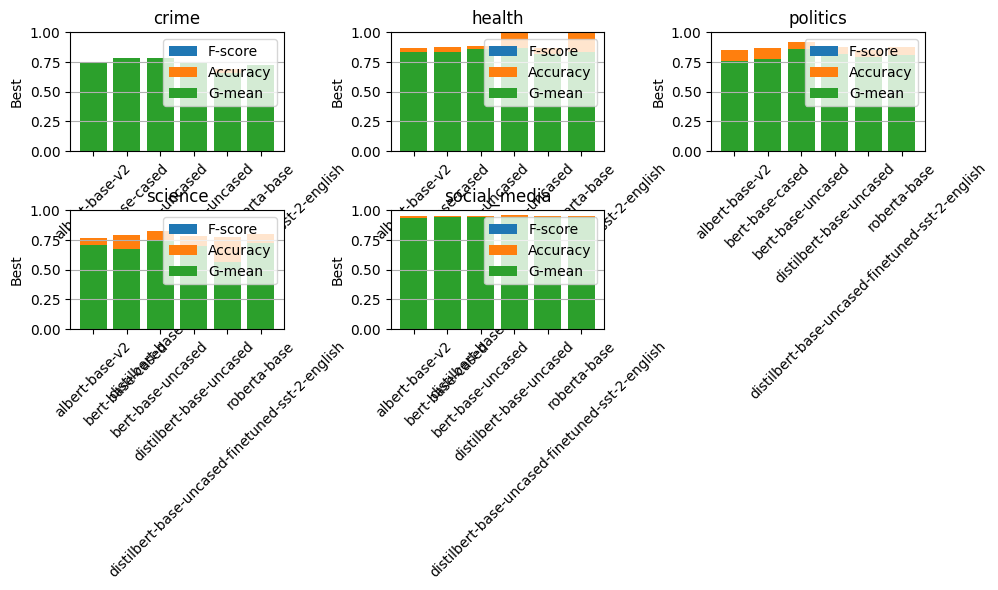

In [85]:
# Plotting
plt.figure(figsize=(10, 6))

# make a grouped bar graph for the best for each metric in each category for each model
for i, category in enumerate(categories):
    plt.subplot(2, 3, i+1)
    plt.title(category)
    plt.ylabel('Best')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.bar([model for model in best[category].keys()], [np.max(value['f_score']) for value in best[category].values()], label='F-score')
    plt.bar([model for model in best[category].keys()], [np.max(value['accuracy']) for value in best[category].values()], label='Accuracy')
    plt.bar([model for model in best[category].keys()], [np.max(value['g_mean']) for value in best[category].values()], label='G-mean')
    plt.legend()

plt.show()

In [86]:
# Get the worst value for each metric in each category for each model, excluding zero values
worst = defaultdict(dict)

for category, data in grouped_data.items():
    for model in data:
        for metric in ['precision', 'recall', 'f_score', 'accuracy', 'g_mean']:
            if model['model'] not in worst[category]:
                worst[category][model['model']] = defaultdict(float)
            if not np.isnan(model[metric]) or data_points[category][model['model']][metric] > 0:
                if worst[category][model['model']][metric] == 0:
                    worst[category][model['model']][metric] = model[metric]
                elif model[metric] < worst[category][model['model']][metric]:
                    worst[category][model['model']][metric] = model[metric]
worst


defaultdict(dict,
            {'crime': {'albert-base-v2': defaultdict(float,
                          {'precision': 0.5,
                           'recall': 0.3089430894308943,
                           'f_score': 0.4,
                           'accuracy': 0.5333333333333333,
                           'g_mean': 0.42990018558994264}),
              'bert-base-cased': defaultdict(float,
                          {'precision': 0.4110429447852761,
                           'recall': 0.3252032520325203,
                           'f_score': 0.4848484848484848,
                           'accuracy': 0.46875,
                           'g_mean': 0.4492218074493236}),
              'bert-base-uncased': defaultdict(float,
                          {'precision': 0.8888888888888888,
                           'recall': 0.2601626016260163,
                           'f_score': 0.4025157232704403,
                           'accuracy': 0.37777777777777777,
                           'g_mean'

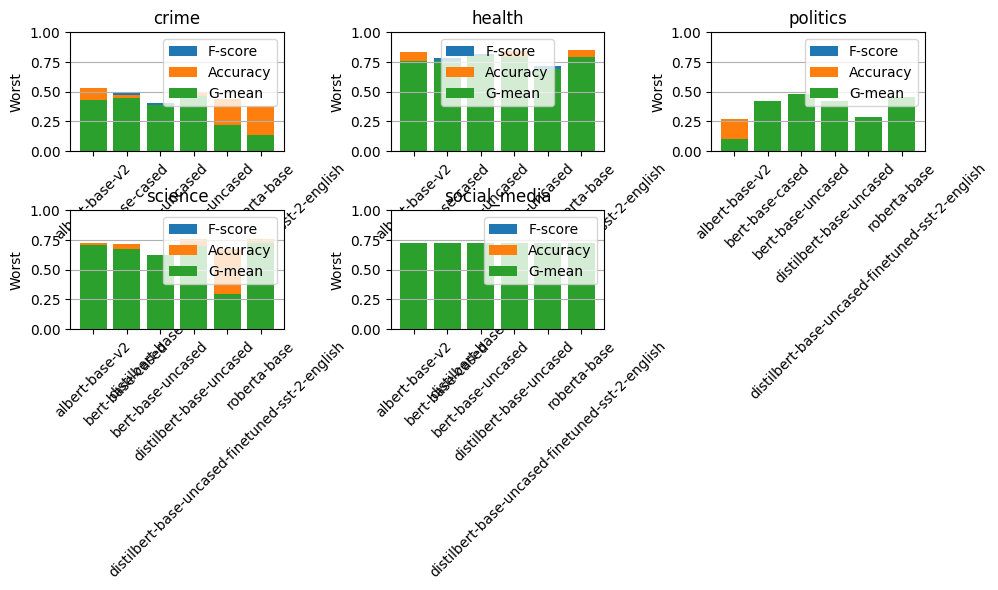

In [87]:
# Plotting
plt.figure(figsize=(10, 6))

# make a grouped bar graph for the worst for each metric in each category
for i, category in enumerate(categories):
    plt.subplot(2, 3, i+1)
    plt.title(category)
    plt.ylabel('Worst')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.bar([model for model in worst[category].keys()], [np.min(value['f_score']) for value in worst[category].values()], label='F-score')
    plt.bar([model for model in worst[category].keys()], [np.min(value['accuracy']) for value in worst[category].values()], label='Accuracy')
    plt.bar([model for model in worst[category].keys()], [np.min(value['g_mean']) for value in worst[category].values()], label='G-mean')
    plt.legend()

In [88]:
import pandas as pd

# create a dataframe for each metric, with the model, average, best and worst for each category as the columns and the rows as the categories
# example: 
# | category | model | average | best | worst |
# |----------|-------|---------|------|-------|
# | crime | bert-base-uncased | 0.1 | 1 | 0 |
# |  | distilbert-base-uncased | 0.1 | 1 | 0 |


# make a row for each model under the category column for each category
precision_df = pd.DataFrame(columns=['category', 'model', 'average', 'best', 'worst'])
recall_df = pd.DataFrame(columns=['category', 'model', 'average', 'best', 'worst'])
f_score_df = pd.DataFrame(columns=['category', 'model', 'average', 'best', 'worst'])
accuracy_df = pd.DataFrame(columns=['category', 'model', 'average', 'best', 'worst'])
g_mean_df = pd.DataFrame(columns=['category', 'model', 'average', 'best', 'worst'])

for category in categories:
    first_row = True
    # get from the averages, best, and worst dictionaries the average, best, and worst for each metric for each model
    for model, metrics in averages[category].items():
        if first_row:
            precision_df = precision_df._append({'category': category, 'model': model, 'average': metrics['precision'], 'best': best[category][model]['precision'], 'worst': worst[category][model]['precision']}, ignore_index=True)
            recall_df = recall_df._append({'category': category, 'model': model, 'average': metrics['recall'], 'best': best[category][model]['recall'], 'worst': worst[category][model]['recall']}, ignore_index=True)
            f_score_df = f_score_df._append({'category': category, 'model': model, 'average': metrics['f_score'], 'best': best[category][model]['f_score'], 'worst': worst[category][model]['f_score']}, ignore_index=True)
            accuracy_df = accuracy_df._append({'category': category, 'model': model, 'average': metrics['accuracy'], 'best': best[category][model]['accuracy'], 'worst': worst[category][model]['accuracy']}, ignore_index=True)
            g_mean_df = g_mean_df._append({'category': category, 'model': model, 'average': metrics['g_mean'], 'best': best[category][model]['g_mean'], 'worst': worst[category][model]['g_mean']}, ignore_index=True)
            first_row = False
        else:
            precision_df = precision_df._append({'category': '', 'model': model, 'average': metrics['precision'], 'best': best[category][model]['precision'], 'worst': worst[category][model]['precision']}, ignore_index=True)
            recall_df = recall_df._append({'category': '', 'model': model, 'average': metrics['recall'], 'best': best[category][model]['recall'], 'worst': worst[category][model]['recall']}, ignore_index=True)
            f_score_df = f_score_df._append({'category': '', 'model': model, 'average': metrics['f_score'], 'best': best[category][model]['f_score'], 'worst': worst[category][model]['f_score']}, ignore_index=True)
            accuracy_df = accuracy_df._append({'category': '', 'model': model, 'average': metrics['accuracy'], 'best': best[category][model]['accuracy'], 'worst': worst[category][model]['accuracy']}, ignore_index=True)
            g_mean_df = g_mean_df._append({'category': '', 'model': model, 'average': metrics['g_mean'], 'best': best[category][model]['g_mean'], 'worst': worst[category][model]['g_mean']}, ignore_index=True)

precision_df

C:\Users\Howard\AppData\Local\Temp\ipykernel_31376\2809474570.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  precision_df = precision_df._append({'category': category, 'model': model, 'average': metrics['precision'], 'best': best[category][model]['precision'], 'worst': worst[category][model]['precision']}, ignore_index=True)
C:\Users\Howard\AppData\Local\Temp\ipykernel_31376\2809474570.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  recall_df = recall_df._append({'category': category,

,category,model,average,best,worst
0,crime,albert-base-v2,0.822937,0.979167,0.500000
1,,bert-base-cased,0.750479,0.980769,0.411043
2,,bert-base-uncased,0.642302,0.940000,0.888889
3,,distilbert-base-uncased,0.711182,0.980000,0.471429
4,,distilbert-base-uncased-finetuned-sst-2-english,0.612435,0.862069,0.464000
5,,roberta-base,0.607586,1.000000,0.630137
6,health,albert-base-v2,0.754134,0.945312,0.894382
7,,bert-base-cased,0.794891,0.949153,0.909091
8,,bert-base-uncased,0.774213,0.913366,0.896761
9,,distilbert-base-uncased,0.789893,0.920601,0.768190


In [89]:
# create a dataframe for all the entries in the data
all_data = []

for category, data in grouped_data.items():
    for entry in data:
        # convert the training loss to a list if it isn't already
        if not isinstance(entry['training_loss'], list):
            entry['training_loss'] = [x[0] for _, x in entry['training_loss'].items()]
        # convert nan in batch size to a string
        if np.isnan(entry['batch_size']):
            entry['batch_size'] = 'nan'
        all_data.append(entry)

all_data_df = pd.DataFrame(all_data)

In [90]:
# get the average per epoch by category for all the entries that have epoch data
epoch_data = []
for category, data in grouped_data.items():
    for entry in data:
        if entry['epochs'] > 0:
            epoch_data.append(entry)

epoch_data_df = pd.DataFrame(epoch_data)
epoch_data_df

,model_id,model,category,datasets,batch_size,epochs,precision,recall,f_score,accuracy,g_mean,training_loss,layers_frozen,learning_rate,class_weights,training_time,inference_time
0,WaHfBSp8SJ,albert-base-v2,crime,[crime],nan,3,0.979167,0.382114,0.549708,0.656250,0.500762,"[0.0, 0.0, 0.0]",0,0.00001,Auto weights,150.615685,4.872590
1,1YWNlDqe55,albert-base-v2,crime,[crime],nan,6,0.962264,0.414634,0.579545,0.669643,0.526931,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0.00001,Auto weights,285.849862,4.483309
2,PWkFZPVmDT,albert-base-v2,crime,"[crime Train: ['fa-kes'], Test: ['snope']]",nan,5,0.616949,0.933333,0.742857,0.600000,0.748331,"[0.0, 0.0, 0.0, 0.0, 0.0]",0,0.00001,Auto weights,220.736444,0.644795
3,tWEPV4LROP,albert-base-v2,crime,[crime],nan,1,0.950000,0.308943,0.466258,0.611607,0.434686,[0.0],0,0.00001,Auto weights,50.094637,4.814550
4,0BdSub5FHX,bert-base-cased,crime,[crime],nan,3,0.980769,0.414634,0.582857,0.674107,0.528685,"[0.0, 0.0, 0.0]",0,0.00001,Auto weights,146.664412,4.168135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,d9Zv4as8x1,distilbert-base-uncased-finetuned-sst-2-english,social_media,[social_media],nan,1,0.961353,0.929907,0.945368,0.953684,0.941720,[0.0],0,0.00001,Auto weights,379.845217,28.776152
335,TUINIqj4ZO,roberta-base,social_media,[social_media],nan,1,0.972780,0.921599,0.946498,0.955101,0.938201,[0.0],0,0.00001,Auto weights,2464.489991,198.132188
336,zFQjRY0E5d,roberta-base,social_media,[social_media],nan,7,0.963447,0.930599,0.946738,0.954878,0.942660,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",0,0.00001,Auto weights,5120.355710,57.685667
337,t4hIxk4x3u,roberta-base,social_media,[social_media],nan,1,0.980341,0.914849,0.946464,0.955400,0.934905,[0.0],0,0.00001,Default weights,732.863555,57.724692


In [91]:
# unique epochs
unique_epochs = epoch_data_df['epochs'].unique()
# sort the epochs
unique_epochs.sort()
unique_epochs

array([1, 3, 4, 5, 6, 7], dtype=int64)

In [92]:
# get the average training loss per epoch for each category
training_losses = defaultdict(list) 
for i, category in enumerate(categories):
  # get the entries from that category
  category_data = epoch_data_df[epoch_data_df['category'] == category]
  # get the data per epoch
  for epoch in unique_epochs:
    # get the entries for that epoch
    epoch_data = category_data[category_data['epochs'] == epoch]
    # get the average training loss for that epoch
    training_losses[category].append(np.mean([x[0] for x in epoch_data['training_loss'].values]))

training_losses

d:\Projects\School\CSI4900\Fake-News-Detection\.venv\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Projects\School\CSI4900\Fake-News-Detection\.venv\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


defaultdict(list,
            {'crime': [0.0,
              0.0,
              0.8311122179031372,
              0.3482299745082855,
              0.37945708903399383,
              0.41300285458564756],
             'health': [0.0, nan, 0.0, 0.0, nan, nan],
             'politics': [0.0, nan, 0.0, 0.0, 0.0, 0.0],
             'science': [nan,
              0.0,
              0.4847000387676975,
              0.6314372229126265,
              0.632365882396698,
              0.3123904883861542],
             'social_media': [0.0, nan, nan, nan, nan, 0.0]})

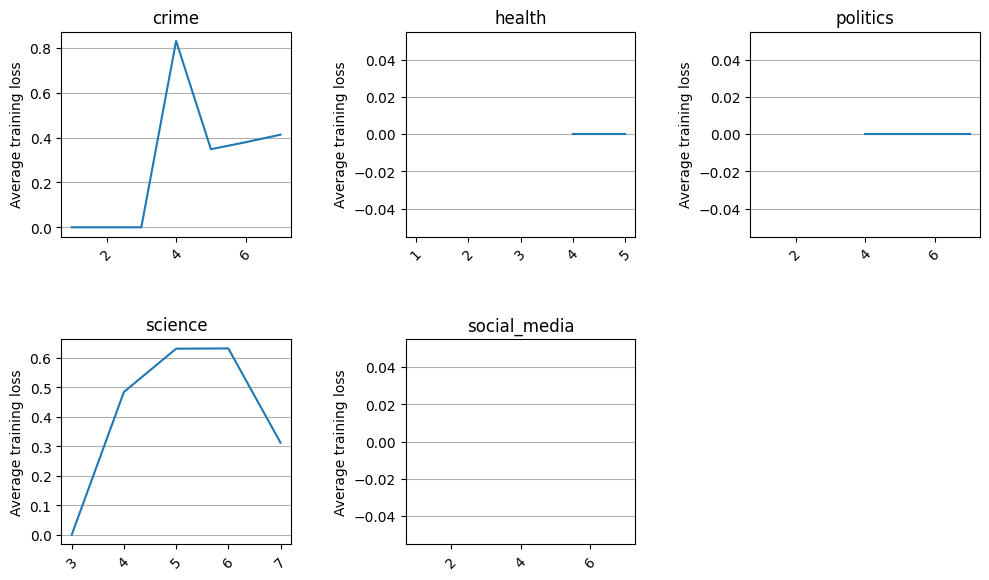

In [98]:
# make graph
plt.figure(figsize=(10, 6))

# make a line graph for the average training loss per epoch for each category
for i, category in enumerate(categories):
    plt.subplot(2, 3, i+1)
    plt.title(category)
    plt.ylabel('Average training loss')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.plot(unique_epochs, training_losses[category])

plt.show()

In [94]:
# get the average metrics per epoch for each category
metrics = defaultdict(dict)
for category, data in grouped_data.items():
    for entry in data:
        if entry['epochs'] > 0:
            if entry['epochs'] not in metrics[category]:
                metrics[category][entry['epochs']] = defaultdict(list)
            metrics[category][entry['epochs']]['precision'].append(entry['precision'])
            metrics[category][entry['epochs']]['recall'].append(entry['recall'])
            metrics[category][entry['epochs']]['f_score'].append(entry['f_score'])
            metrics[category][entry['epochs']]['accuracy'].append(entry['accuracy'])
            metrics[category][entry['epochs']]['g_mean'].append(entry['g_mean'])

metrics

defaultdict(dict,
            {'crime': {3: defaultdict(list,
                          {'precision': [0.9791666666666666,
                            0.9807692307692307,
                            0.94,
                            0.98,
                            0.8615384615384616,
                            1.0],
                           'recall': [0.3821138211382114,
                            0.4146341463414634,
                            0.3821138211382114,
                            0.3983739837398374,
                            0.45528455284552843,
                            0.3902439024390244],
                           'f_score': [0.5497076023391814,
                            0.5828571428571429,
                            0.5433526011560694,
                            0.5664739884393063,
                            0.5957446808510638,
                            0.5614035087719299],
                           'accuracy': [0.65625,
                            0.

In [95]:
# get the average metrics per epoch for each category
averages = defaultdict(dict)
for category, data in metrics.items():
    for epoch, metrics in data.items():
        if epoch not in averages[category]:
            averages[category][epoch] = defaultdict(float)
        averages[category][epoch]['precision'] = np.mean(metrics['precision'])
        averages[category][epoch]['recall'] = np.mean(metrics['recall'])
        averages[category][epoch]['f_score'] = np.mean(metrics['f_score'])
        averages[category][epoch]['accuracy'] = np.mean(metrics['accuracy'])
        averages[category][epoch]['g_mean'] = np.mean(metrics['g_mean'])

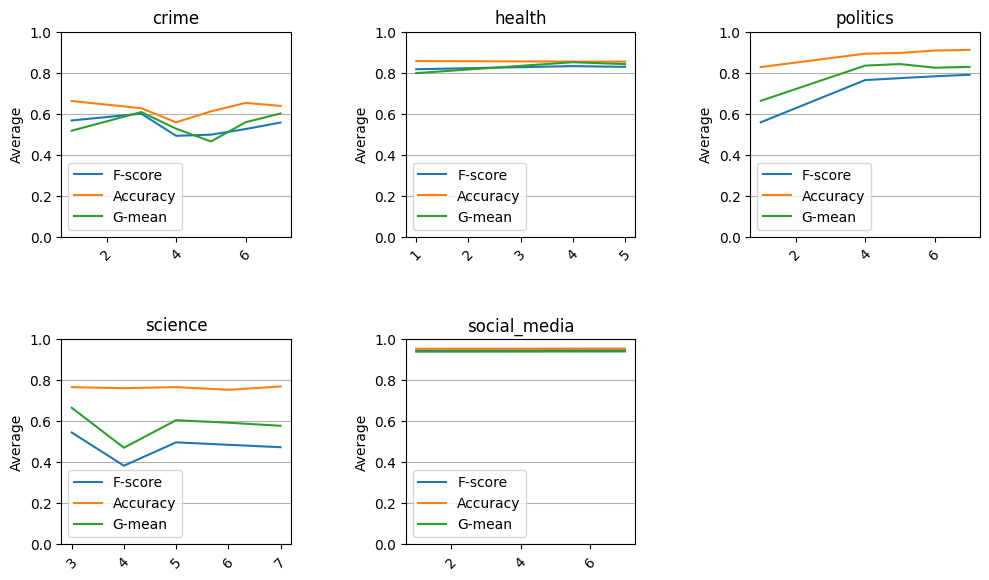

In [96]:
# make graph
plt.figure(figsize=(10, 6))

# make a line graph for the average metrics per epoch for each category

for i, category in enumerate(categories):
    epochs = [epoch for epoch in averages[category].keys()]
    epochs.sort()
    plt.subplot(2, 3, i+1)
    plt.title(category)
    plt.ylabel('Average')
    plt.ylim(0, 1)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.subplots_adjust(wspace=0.5)
    plt.plot(epochs, [value['f_score'] for value in averages[category].values()], label='F-score')
    plt.plot(epochs, [value['accuracy'] for value in averages[category].values()], label='Accuracy')
    plt.plot(epochs, [value['g_mean'] for value in averages[category].values()], label='G-mean')
    plt.legend()

plt.show()

In [97]:
# export the data to excel
import xlsxwriter

def set_column_widths(worksheet):
    worksheet.set_column('B:B', 12)
    worksheet.set_column('C:C', 40)
    worksheet.set_column('D:D', 15)
    worksheet.set_column('E:E', 15)
    worksheet.set_column('F:F', 15)

def set_all_data_widths():
    worksheet = writer.sheets['All Data']
    worksheet.set_column('B:B', 15)
    worksheet.set_column('C:C', 40)
    worksheet.set_column('D:D', 10)
    worksheet.set_column('E:E', 20)
    worksheet.set_column('F:F', 12)
    worksheet.set_column('G:G', 12)
    worksheet.set_column('H:H', 15)
    worksheet.set_column('I:I', 15)
    worksheet.set_column('J:J', 15)
    worksheet.set_column('K:K', 15)
    worksheet.set_column('L:L', 15)
    worksheet.set_column('M:M', 40)
    worksheet.set_column('N:N', 15)
    worksheet.set_column('O:O', 15)
    worksheet.set_column('P:P', 15)

def add_chart(sheet_name, title, worksheet):

    category_index = 2

    for index, category in enumerate(categories):
        models = averages[category].keys()
        # Create vertical bar graphs for the average, best, and worst for each category, with the model name as the zone and the metric value as the value
        chart = workbook.add_chart({'type': 'column'})
        chart.add_series({
            'name': 'Average',
            'values': f'={sheet_name}!$D${category_index}:$D${category_index + len(models) - 1}',
            'categories': f'={sheet_name}!$C${category_index}:$C${category_index + len(models) - 1}',
            'fill': {
                'color': '#42A5F5'
            }
        })

        chart.add_series({
            'name': 'Best',
            'values': f'={sheet_name}!$E${category_index}:$E${category_index + len(models) - 1}',
            'categories': f'={sheet_name}!$C${category_index}:$C${category_index + len(models) - 1}',
            'fill': {
                'color': '#66BB6A'
            }
        })

        chart.add_series({
            'name': 'Worst',
            'values': f'={sheet_name}!$F${category_index}:$F${category_index + len(models) - 1}',
            'categories': f'={sheet_name}!$C${category_index}:$C${category_index + len(models) - 1}',
            'fill': {
                'color': '#EF5350'
            }
        })

        chart.set_title({'name': f'{category} {title}'})
        chart.set_x_axis({'name': 'Model'})
        chart.set_y_axis({'name': 'Metric Value'})
        chart.set_legend({'position': 'bottom'})
        chart.set_size({'width': 750, 'height': 600})
        chart.set_y_axis({'min': 0, 'max': 1})

        worksheet.insert_chart(f'{"H" if index % 2 == 0 else "T"}{index // 2 * 31 + 2}', chart)

        category_index += len(models)



def all_metrics_chart(type = 'Average', cell = 'B2'):
    rows = f'D$2:$D${len(categories) + 1}' if type == 'Worst' else f'C$2:$C${len(categories) + 1}' if type == 'Best' else f'B$2:$B${len(categories) + 1}'
    # create a vertical bar graph of the average values for all the metrics
    chart = workbook.add_chart({'type': 'column'})
    chart.add_series({
        'name': 'Precision',
        'values': f'=Precision!{rows}',
        'categories': f'=Precision!$B$2:$B${len(categories) + 1}',
        'fill': {
            'color': '#42A5F5'
        }
    })

    chart.add_series({
        'name': 'Recall',
        'values': f'=Recall!{rows}',
        'categories': f'=Recall!$B$2:$B${len(categories) + 1}',
        'fill': {
            'color': '#66BB6A'
        }
    })

    chart.add_series({
        'name': 'F-score',
        'values': f'=F_score!{rows}',
        'categories': f'=F_score!$B$2:$B${len(categories) + 1}',
        'fill': {
            'color': '#EF5350'
        }
    })

    chart.add_series({
        'name': 'Accuracy',
        'values': f'=Accuracy!{rows}',
        'categories': f'=Accuracy!$B$2:$B${len(categories) + 1}',
        'fill': {
            'color': '#FFA726'
        }
    })

    chart.add_series({
        'name': 'G-mean',
        'values': f'=G_mean!{rows}',
        'categories': f'=G_mean!$B$2:$B${len(categories) + 1}',
        'fill': {
            'color': '#AB47BC'
        }
    })

    chart.set_title({'name': f'{type} Metrics'})
    chart.set_x_axis({'name': 'Category'})
    chart.set_y_axis({'name': 'Metric Value'})
    chart.set_legend({'position': 'bottom'})
    chart.set_size({'width': 750, 'height': 600})
    chart.set_y_axis({'min': 0, 'max': 1})

    worksheet = writer.sheets['All Metrics']
    worksheet.insert_chart(cell, chart)

# export to excel
with pd.ExcelWriter('detection_results.xlsx', engine='xlsxwriter') as writer:
    precision_df.to_excel(writer, sheet_name='Precision')
    recall_df.to_excel(writer, sheet_name='Recall')
    f_score_df.to_excel(writer, sheet_name='F_score')
    accuracy_df.to_excel(writer, sheet_name='Accuracy')
    g_mean_df.to_excel(writer, sheet_name='G_mean')
    all_data_df.to_excel(writer, sheet_name='All Data')

    # create a workbook
    workbook = writer.book

    precision_sheet = writer.sheets['Precision']
    recall_sheet = writer.sheets['Recall']
    f_score_sheet = writer.sheets['F_score']
    accuracy_sheet = writer.sheets['Accuracy']
    g_mean_sheet = writer.sheets['G_mean']

    # set the column widths
    set_column_widths(precision_sheet)
    set_column_widths(recall_sheet)
    set_column_widths(f_score_sheet)
    set_column_widths(accuracy_sheet)
    set_column_widths(g_mean_sheet)

    # set the column widths for the all data sheet
    set_all_data_widths()

    # add a chart for each metric
    add_chart('Precision', 'Precision', precision_sheet)
    add_chart('Recall', 'Recall', recall_sheet)
    add_chart('F_score', 'F-score', f_score_sheet)
    add_chart('Accuracy', 'Accuracy', accuracy_sheet)
    add_chart('G_mean', 'G-mean', g_mean_sheet)

    # add a chart for all the metrics
    workbook.add_worksheet('Epoch Metrics')
